# Imports

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error
from collaborative_filtering import *
import pandas as pd
import time

# Define Data

In [14]:
item_user_matrix = np.array([
    [0,1,1,0,0],
    [2,3,1,0,2],
    [1,0,2,0,1],
    [0,4,3,2,0]
])

V = pd.DataFrame(item_user_matrix, columns=['Jim', 'Pam', 'Michael', 'Angela', 'Erin'], index=['Fruits', 'Vegetables', 'Coffee', 'Bread'])

In [15]:
V

,Jim,Pam,Michael,Angela,Erin
Fruits,0,1,1,0,0
Vegetables,2,3,1,0,2
Coffee,1,0,2,0,1
Bread,0,4,3,2,0


In [16]:
nmf = NMF(n_components=3).fit(item_user_matrix)
H = nmf.components_
W = nmf.transform(item_user_matrix)

In [17]:
reconstruct_H = pd.DataFrame(H, columns=['Jim', 'Pam', 'Michael', 'Angela', 'Erin'])
reconstruct_H

,Jim,Pam,Michael,Angela,Erin
0,0.027240,9.543848,0.000000,0.904880,0.027240
1,2.137091,0.098697,1.221059,0.000000,2.137091
2,0.000000,0.000000,1.739512,0.735176,0.000000


In [18]:
reconstructed_W = pd.DataFrame(W, index=['Fruits', 'Vegetables', 'Coffee', 'Bread'])
reconstructed_W

,0,1,2
Fruits,0.100281,0.023213,0.455221
Vegetables,0.302166,0.916377,0.000000
Coffee,0.000000,0.495681,0.680289
Bread,0.422063,0.000000,1.796809


In [19]:
np.dot(W, H)

array([[0.05234081, 0.9593575 , 0.82020749, 0.42540992, 0.05234081],
       [1.96661212, 2.9742665 , 1.11895058, 0.27342363, 1.96661212],
       [1.05931551, 0.04892206, 1.78862724, 0.50013245, 1.05931551],
       [0.01149697, 4.02810451, 3.12556993, 1.70288699, 0.01149697]])

# Recommender System with no Dim. Reduction

In [3]:
nmf_pred = nmf_wrapper(item_user_matrix)

In [4]:
mse = mean_squared_error(item_user_matrix, nmf_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.03623154133121916


# Recommender System with PCA

In [5]:
pred_nmf_pca = nmf_pca_wrapper(item_user_matrix)

In [6]:
mse = mean_squared_error(item_user_matrix, pred_nmf_pca)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.46955501445551


# Recommender System Using LU_CRTP

In [7]:
pred = lu_crtp_wrapper(item_user_matrix)

In [8]:
mse = mean_squared_error(item_user_matrix, pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.7315857487660493


# Test Loop

In [50]:
# test runtime and closeness to actual matrix
runtime_results = pd.DataFrame(columns=['n', 'NMF', 'PCA_NMF', 'LU_CRTP'])
mae_results = pd.DataFrame(columns=['n', 'NMF', 'PCA_NMF', 'LU_CRTP'])
mae_results.loc[len(mae_results)] = [0, 0, 0, 0]
runtime_results.loc[len(runtime_results)] = [0, 0, 0, 0]


for n in range(500, 5001, 500):
    item_user_matrix = np.random.randint(6, size=(n, n))
    orig_matrix = np.copy(item_user_matrix)
    
    # We should be dealing with a sparse matrix, so let's delete 60% of the values
    delete_count = int(n * n * 0.6)
    delete_idx = np.unravel_index(np.random.choice(n * n, delete_count, replace=False), item_user_matrix.shape)
    item_user_matrix[delete_idx] = 0

    mae = [n]
    runtime = [n]
    for wrapper in [nmf_wrapper, nmf_pca_wrapper, lu_crtp_wrapper]:
        begin = time.time()
        mae.append(mean_squared_error(orig_matrix, wrapper(item_user_matrix)))
        runtime.append(time.time() - begin)

    print(item_user_matrix.shape)

    mae_results.loc[len(mae_results)] = mae
    runtime_results.loc[len(runtime_results)] = runtime

/home/nico/VSCodeRepos/stl-implementation/stl-implementation/.conda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(500, 500)


/home/nico/VSCodeRepos/stl-implementation/stl-implementation/.conda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(1000, 1000)


/home/nico/VSCodeRepos/stl-implementation/stl-implementation/.conda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(1500, 1500)


/home/nico/VSCodeRepos/stl-implementation/stl-implementation/.conda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(2000, 2000)


/home/nico/VSCodeRepos/stl-implementation/stl-implementation/.conda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(2500, 2500)


/home/nico/VSCodeRepos/stl-implementation/stl-implementation/.conda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(3000, 3000)


/home/nico/VSCodeRepos/stl-implementation/stl-implementation/.conda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(3500, 3500)


/home/nico/VSCodeRepos/stl-implementation/stl-implementation/.conda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(4000, 4000)


/home/nico/VSCodeRepos/stl-implementation/stl-implementation/.conda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(4500, 4500)


/home/nico/VSCodeRepos/stl-implementation/stl-implementation/.conda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(5000, 5000)


In [51]:
import matplotlib.pyplot as plt

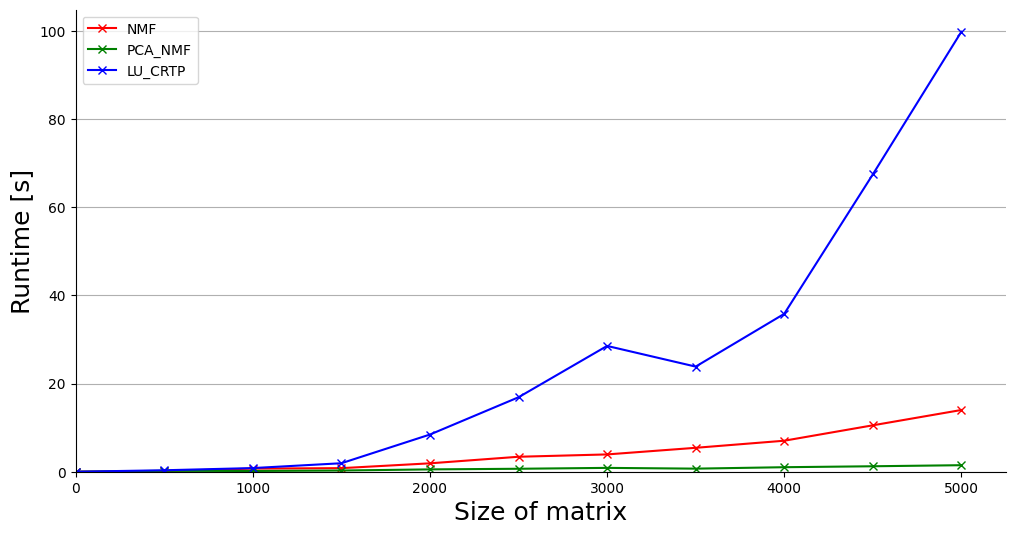

In [63]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.set_size_inches
colors = ['red', 'green', 'blue']

for i, column in enumerate(runtime_results.columns[1:]):
    ax.plot(runtime_results['n'], runtime_results[column], marker='x', label=column, c=colors[i])

plt.xlabel('Size of matrix', fontsize=18)
plt.ylabel('Runtime [s]', fontsize=18)
plt.legend()
plt.grid(True, axis='y')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0)
ax.set_xlim(0)

plt.savefig('figures/cf_runtime.png')
plt.show()

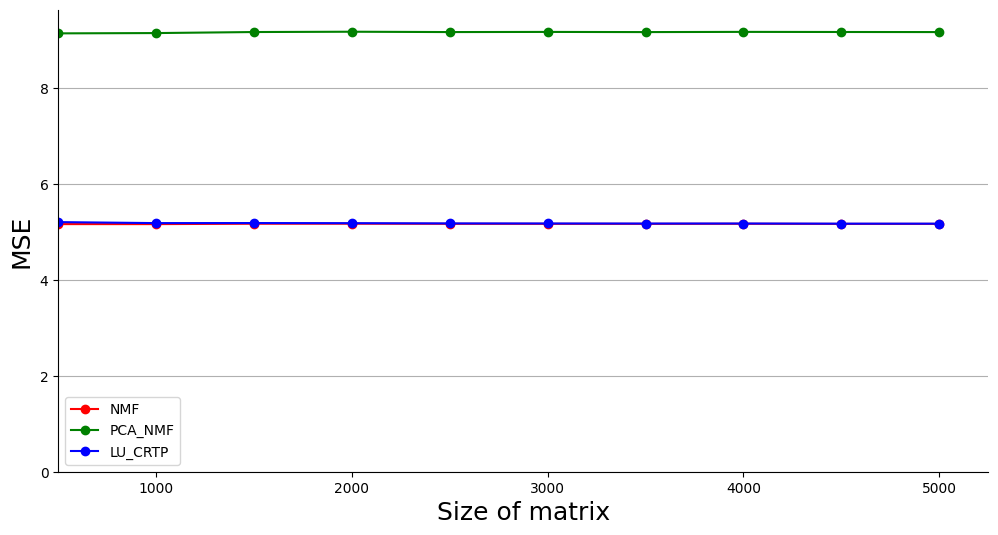

In [64]:
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['red', 'green', 'blue']

for i, column in enumerate(mae_results.columns[1:]):
    ax.plot(mae_results['n'], mae_results[column], marker='o', label=column, c=colors[i])

plt.xlabel('Size of matrix', fontsize=18)
plt.ylabel('MSE', fontsize=18)
plt.legend()
plt.grid(True, axis='y')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0)
ax.set_xlim(500)

plt.savefig('figures/cf_mae.png')
plt.show()